In [1]:
try:
    %load_ext google.colab.data_table
except Exception as e:
    pass
import json
import pandas as pd
from matplotlib import pyplot as plt
from time import sleep
try:
    %matplotlib inline
except Exception as e:
    pass


In [2]:
try:
    from google.colab import files
    uploaded = files.upload()
    data:dict = json.loads(uploaded['data-trunc.json'])
except Exception as e:
    with open('./data-trunc.json') as f:
        # 500ms~
        data: dict = json.load(f)

In [24]:
try:
    import util
    get_chunks = util.get_chunks
    simulate_stream = util.simulate_stream
except:
    def get_chunks(data, chunksize=10000, chunk_count=None):
        chunks = []
        chunk = dict()
        count = 0
        for i, (key, value) in enumerate(data.items()):
            if i and i % chunksize == 0:
                chunks.append(chunk)
                count += 1
                chunk = dict()
                if chunk_count and chunk_count == count:
                    return chunks
            chunk[key] = value
        return chunks



    def simulate_stream(data):
        """Yields a DataFrame"""
        keys = list(data.keys())
        for i, (key, value) in enumerate(data.items()):
            try:
                yield pd.DataFrame({key: value})
                nextkey = int(keys[i + 1])
                diff_sec = (nextkey - int(key)) / 1000
                sleep(diff_sec)
            except IndexError:
                # end of file
                return

In [25]:
chunk = get_chunks(data, chunksize=100, chunk_count=1)[0]

{'1577836803078': {'assetA': {'ask': 7189, 'bid': 7188.89},
  'assetB': {'ask': 7170.25, 'bid': 7169.5}},
 '1577836806371': {'assetA': {'ask': 7190.09, 'bid': 7190.05},
  'assetB': {'ask': 7170.25, 'bid': 7169.5}},
 '1577836806459': {'assetA': {'ask': 7190.09, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836806474': {'assetA': {'ask': 7190.43, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836806575': {'assetA': {'ask': 7190.39, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807242': {'assetA': {'ask': 7190.33, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807344': {'assetA': {'ask': 7190.25, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807444': {'assetA': {'ask': 7190.21, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807545': {'assetA': {'ask': 7190.12, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807649': {'assetA': 

In [26]:
chunkiter = iter(chunk)
key0 = int(next(chunkiter))
timestamps = []
assetA_asks = []
assetB_asks = []
assetA_bids = []
assetB_bids = []
for i, (k, v) in enumerate(chunk.items()):
    assetA_ask = v['assetA']['ask']
    assetB_ask = v['assetB']['ask']
    assetA_bid = v['assetA']['bid']
    assetB_bid = v['assetB']['bid']
    norm_key = int(k) - key0
    timestamps.append(norm_key)
    assetA_asks.append(assetA_ask)
    assetB_asks.append(assetB_ask)
    assetA_bids.append(assetA_bid)
    assetB_bids.append(assetB_bid)

In [27]:
timestamps[:7]

[0, 3293, 3381, 3396, 3497, 4164, 4266]

In [28]:
assetA_asks[:7]

[7189, 7190.09, 7190.09, 7190.43, 7190.39, 7190.33, 7190.25]

In [29]:
assetA_bids[:7]

[7188.89, 7190.05, 7190.05, 7190.05, 7190.05, 7189.92, 7189.92]

In [30]:
assetB_asks[:7]

[7170.25, 7170.25, 7170.5, 7170.5, 7170.5, 7170.5, 7170.5]

In [31]:
assetB_bids[:7]

[7169.5, 7169.5, 7169.5, 7169.5, 7169.5, 7169.5, 7169.5]

Text(0, 0.5, 'Price')

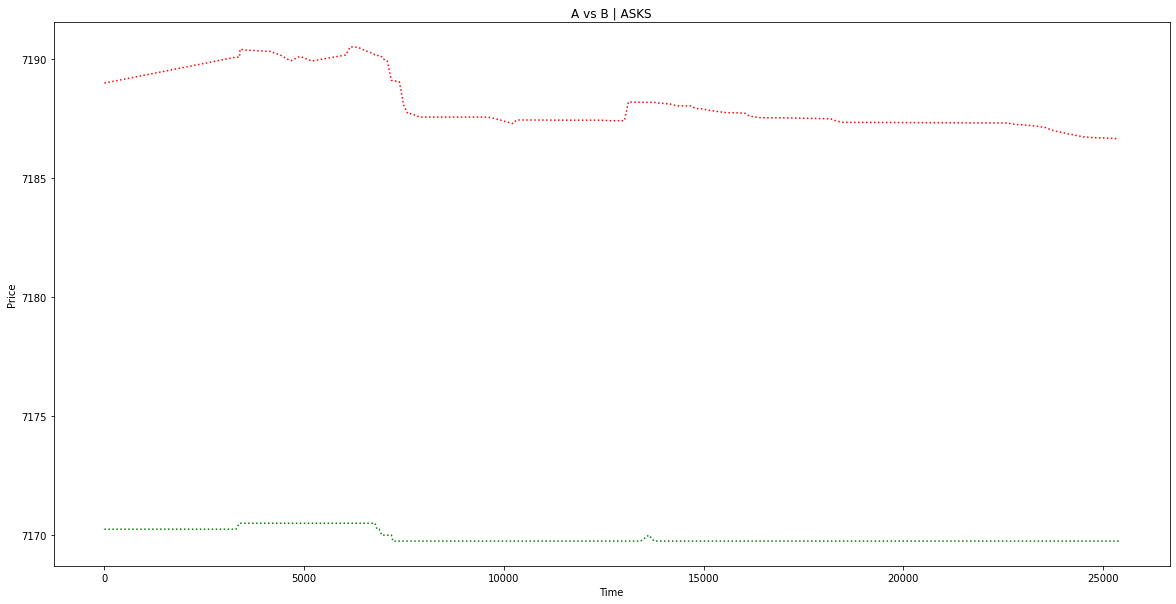

In [32]:
# A vs B | ASKS
plt.figure(figsize=(20,10))
plt.plot(timestamps, assetA_asks,':r',
         timestamps, assetB_asks, ':g')
plt.title('A vs B | ASKS')
plt.xlabel('Time')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

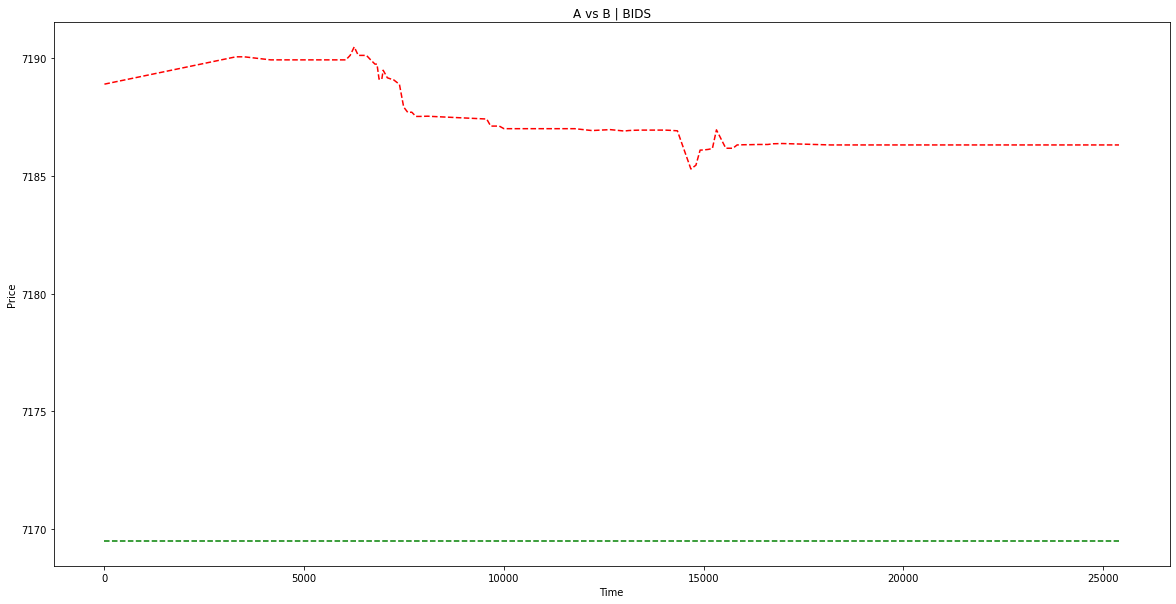

In [33]:
# A vs B | BIDS
plt.figure(figsize=(20,10))
plt.plot(timestamps, assetA_bids,'--r',
         timestamps, assetB_bids, '--g')
plt.title('A vs B | BIDS')
plt.xlabel('Time')
plt.ylabel('Price')

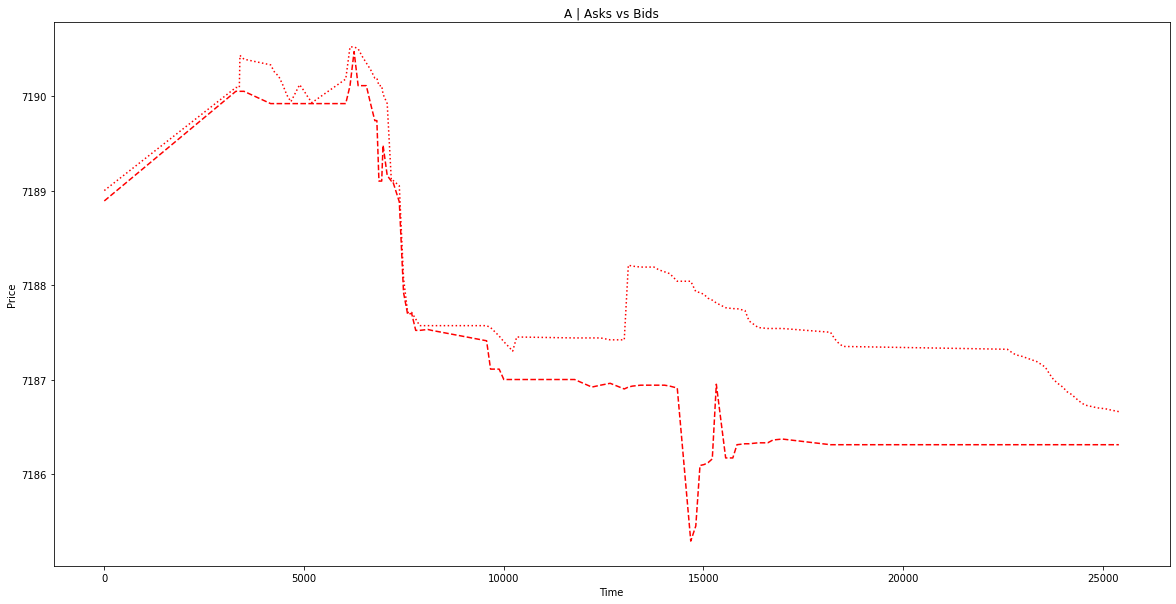

In [34]:
# A | Asks vs Bids
plt.figure(figsize=(20,10))
plt.plot(timestamps, assetA_asks, ':r',
         timestamps, assetA_bids, '--r')
plt.title('A | Asks vs Bids')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

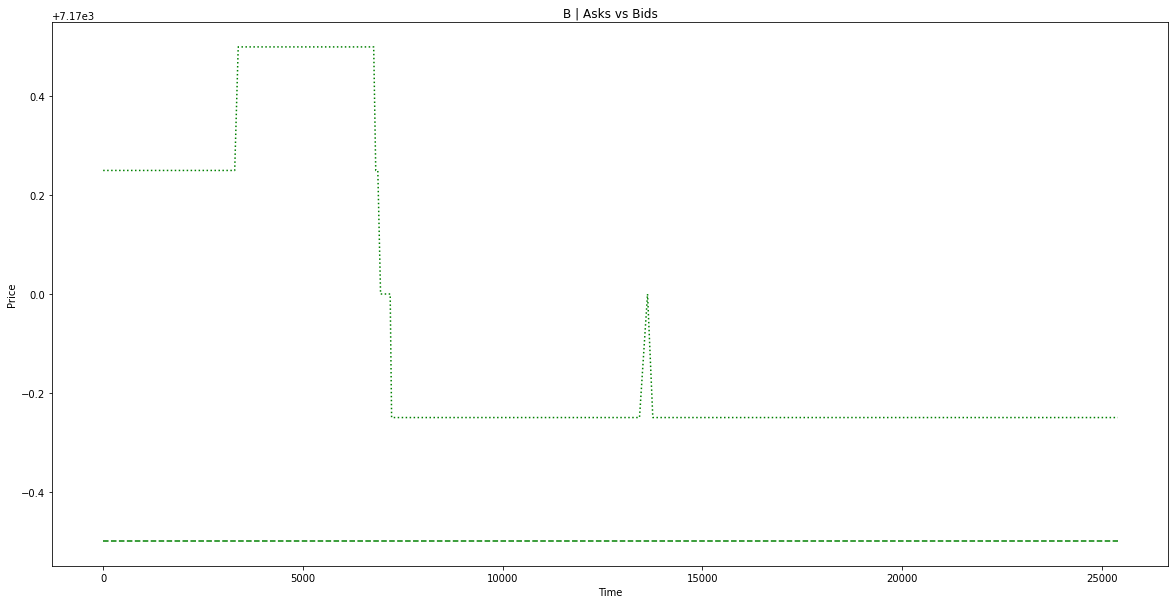

In [35]:
# B | Asks vs Bids
plt.figure(figsize=(20,10))
plt.plot(timestamps, assetB_asks, ':g',
         timestamps, assetB_bids, '--g')
plt.title('B | Asks vs Bids')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [40]:
df1 = pd.DataFrame.from_dict(chunk,orient='index')
df1

,assetA,assetB
1577836803078,"{'ask': 7189, 'bid': 7188.89}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806371,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806459,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836806474,"{'ask': 7190.43, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836806575,"{'ask': 7190.39, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
...,...,...
1577836827732,"{'ask': 7186.72, 'bid': 7186.31}","{'ask': 7169.75, 'bid': 7169.5}"
1577836827941,"{'ask': 7186.7, 'bid': 7186.31}","{'ask': 7169.75, 'bid': 7169.5}"
1577836828147,"{'ask': 7186.69, 'bid': 7186.31}","{'ask': 7169.75, 'bid': 7169.5}"
1577836828247,"{'ask': 7186.68, 'bid': 7186.31}","{'ask': 7169.75, 'bid': 7169.5}"


In [92]:
df2 = pd.read_json('./data-trunc.json', orient='index')

df2

,assetA,assetB
2020-01-01 00:00:03.078,"{'ask': 7189, 'bid': 7188.89}","{'ask': 7170.25, 'bid': 7169.5}"
2020-01-01 00:00:06.371,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.25, 'bid': 7169.5}"
2020-01-01 00:00:06.459,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
2020-01-01 00:00:06.474,"{'ask': 7190.43, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
2020-01-01 00:00:06.575,"{'ask': 7190.39, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
...,...,...
2020-01-01 00:05:37.281,"{'ask': 7175.73, 'bid': 7175.43}","{'ask': 7156.75, 'bid': 7155.25}"
2020-01-01 00:05:37.455,"{'ask': 7175.73, 'bid': 7175.43}","{'ask': 7156.75, 'bid': 7155}"
2020-01-01 00:05:37.556,"{'ask': 7175.68, 'bid': 7175.43}","{'ask': 7156.75, 'bid': 7155}"
2020-01-01 00:05:37.601,"{'ask': 7175.68, 'bid': 7175.43}","{'ask': 7156.25, 'bid': 7155}"


In [ ]:
def asks(state):
    ask_ = state['ask']
    return ask_
def bids(state):
    bid_ = state['bid']
    return bid_

In [93]:
assetA = df2.assetA.apply([asks, bids])

,asks,bids
2020-01-01 00:00:03.078,7189.00,7188.89
2020-01-01 00:00:06.371,7190.09,7190.05
2020-01-01 00:00:06.459,7190.09,7190.05
2020-01-01 00:00:06.474,7190.43,7190.05
2020-01-01 00:00:06.575,7190.39,7190.05
...,...,...
2020-01-01 00:05:37.281,7175.73,7175.43
2020-01-01 00:05:37.455,7175.73,7175.43
2020-01-01 00:05:37.556,7175.68,7175.43
2020-01-01 00:05:37.601,7175.68,7175.43


In [94]:
assetB = df2.assetB.apply([asks, bids])

,asks,bids
2020-01-01 00:00:03.078,7170.25,7169.50
2020-01-01 00:00:06.371,7170.25,7169.50
2020-01-01 00:00:06.459,7170.50,7169.50
2020-01-01 00:00:06.474,7170.50,7169.50
2020-01-01 00:00:06.575,7170.50,7169.50
...,...,...
2020-01-01 00:05:37.281,7156.75,7155.25
2020-01-01 00:05:37.455,7156.75,7155.00
2020-01-01 00:05:37.556,7156.75,7155.00
2020-01-01 00:05:37.601,7156.25,7155.00


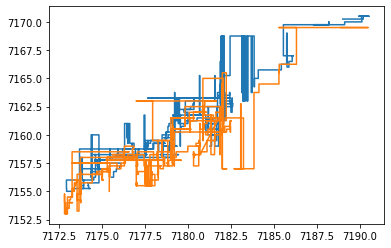

In [95]:
plt.plot(assetA, assetB)
